In [1]:
import sys
from glob import glob

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

import rasterio as rio
from rasterio.plot import show
from rasterio import plot
from rasterio.plot import show_hist

### Imágenes .tif: https://drive.google.com/file/d/14ZV8BXU8JZYYTb6ifq54q84MaIhL1H3s/view?usp=sharing

In [2]:
img1 = ".../dataset/polygon_images/RT_L1C_T19JDJ_A035557_20220413T144923.tif"
img2 = ".../dataset/polygon_images/RT_T19JDJ_A035986_20220513T144515.tif"
img3 = ".../dataset/polygon_images/RT_T19JDJ_A036844_20220712T144937.tif"
img4 = ".../dataset/polygon_images/RT_T19JDJ_A037559_20220831T144448.tif"
img5 = ".../dataset/polygon_images/RT_T19JDJ_A037702_20220910T144450.tif"
img6 = ".../dataset/polygon_images/RT_T19JDJ_A037988_20220930T145022.tif"

In [3]:
dem = rio.open(img1)

#### Sistema de referencia de coordenadas

In [4]:
dem.crs

CRS.from_epsg(32719)

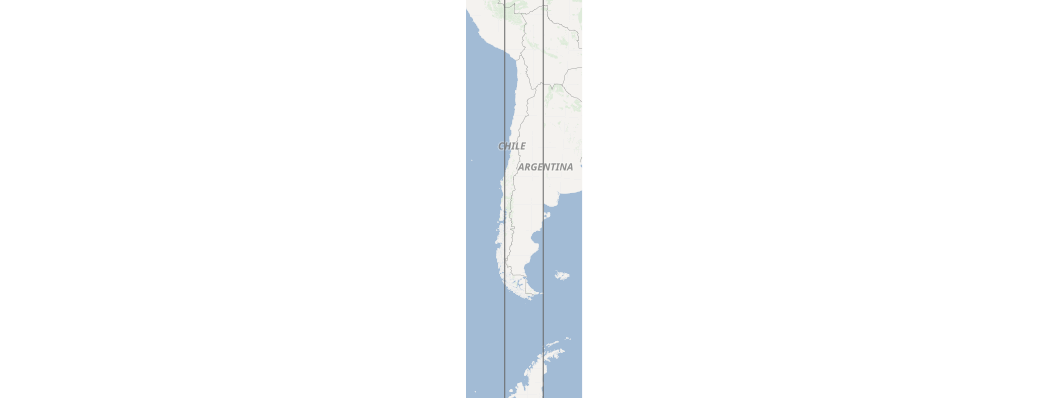

#### Dimensiones y cantidad de bandas

In [5]:
print("Ancho: ", dem.width)
print("Alto: ", dem.height)
print("Bandas: ", dem.count) # R,G,B,NIR y SWIR 1

Ancho:  3688
Alto:  4222
Bandas:  5


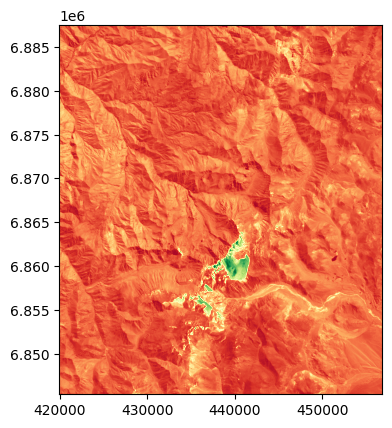

<AxesSubplot:>

In [6]:
show(dem, cmap='RdYlGn')

In [7]:
def plot_histogram(dem, title=""):
    fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
    show((dem, [1,2,3]), ax=axrgb)
    show_hist((dem, [1,2,3]), bins=50, histtype='stepfilled',
              lw=0.0, stacked=False, alpha=0.3, ax=axhist, title=title)
    plt.legend(["B","G","R"])
    plt.show()

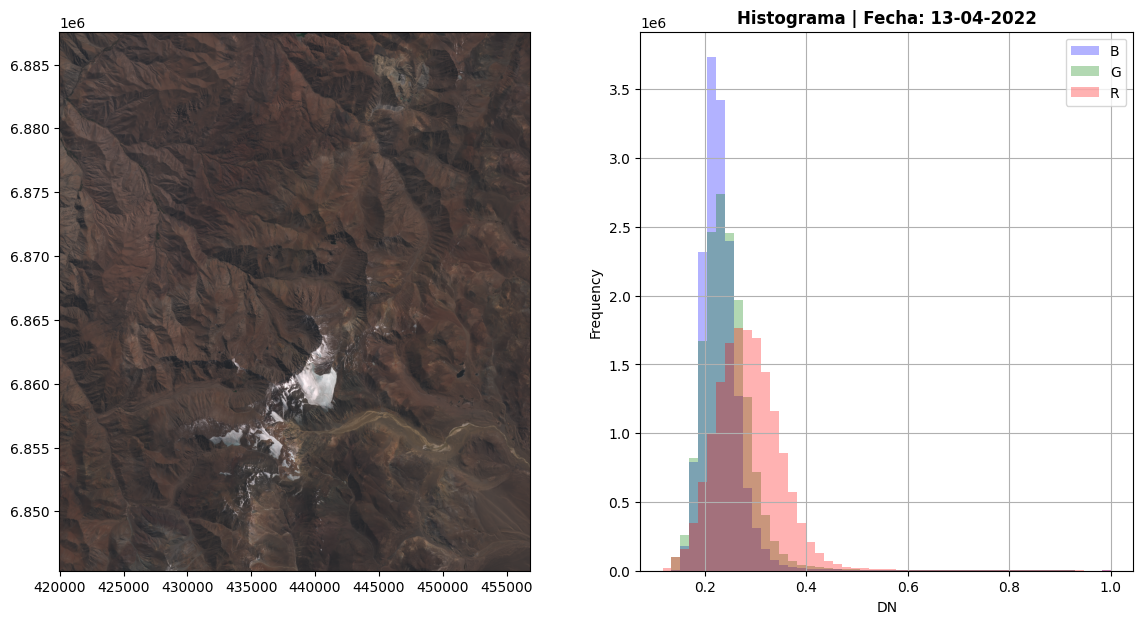

In [8]:
plot_histogram(dem, "Histograma | Fecha: 13-04-2022")

In [9]:
# https://github.com/awesome-spectral-indices/awesome-spectral-indices#expressions
#bands = ["R", "G", "B", "Red Edge 1", "Red Edge 2", "Red Edge 3", "NIR", "NIR 2", "SWIR 1", "SWIR 2"]
bands = ["R", "G", "B", "NIR", "SWIR"]

In [10]:
def plot_bands(read_bands, ncols=5, nrows=1):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 5), sharey=True)
    fig.tight_layout()
    
    for i in range(ncols):
        show(read_bands[i], ax=ax[i])
        ax[i].set_title("Banda {} ({})".format(i, bands[i]))


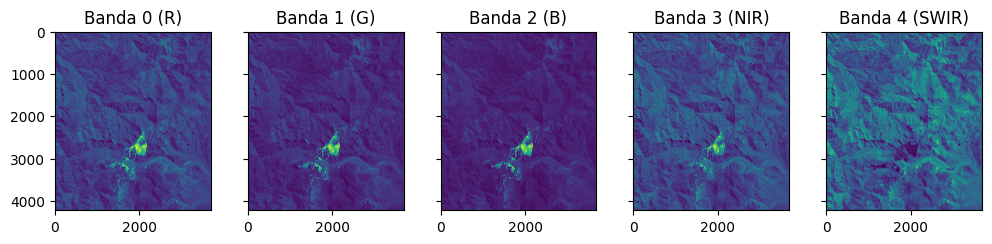

In [11]:
read_bands = [dem.read(idx) for idx in range(1, len(bands)+1)]
plot_bands(read_bands, 5, 1)

In [12]:
dem_img2 = rio.open(img2)

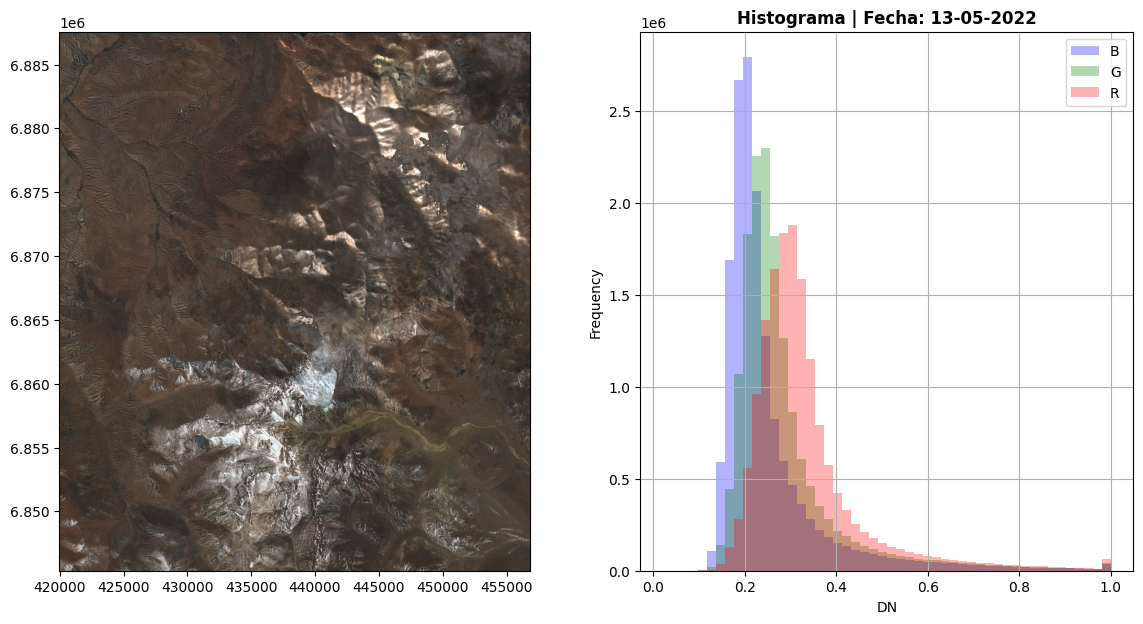

In [13]:
plot_histogram(dem_img2, "Histograma | Fecha: 13-05-2022") # Mostrar como problemas

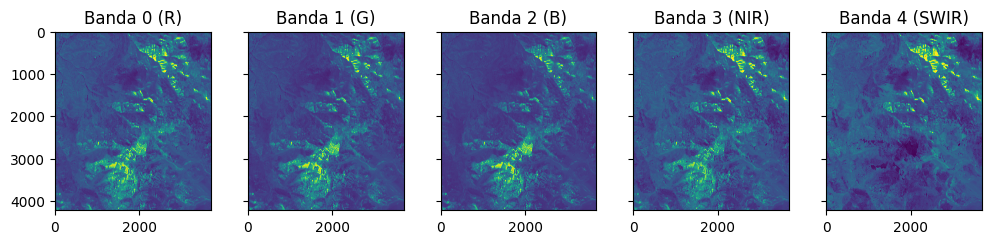

In [14]:
read_bands = [dem_img2.read(idx) for idx in range(1, len(bands)+1)]
plot_bands(read_bands, 5, 1)

In [15]:
dem_img3 = rio.open(img3)

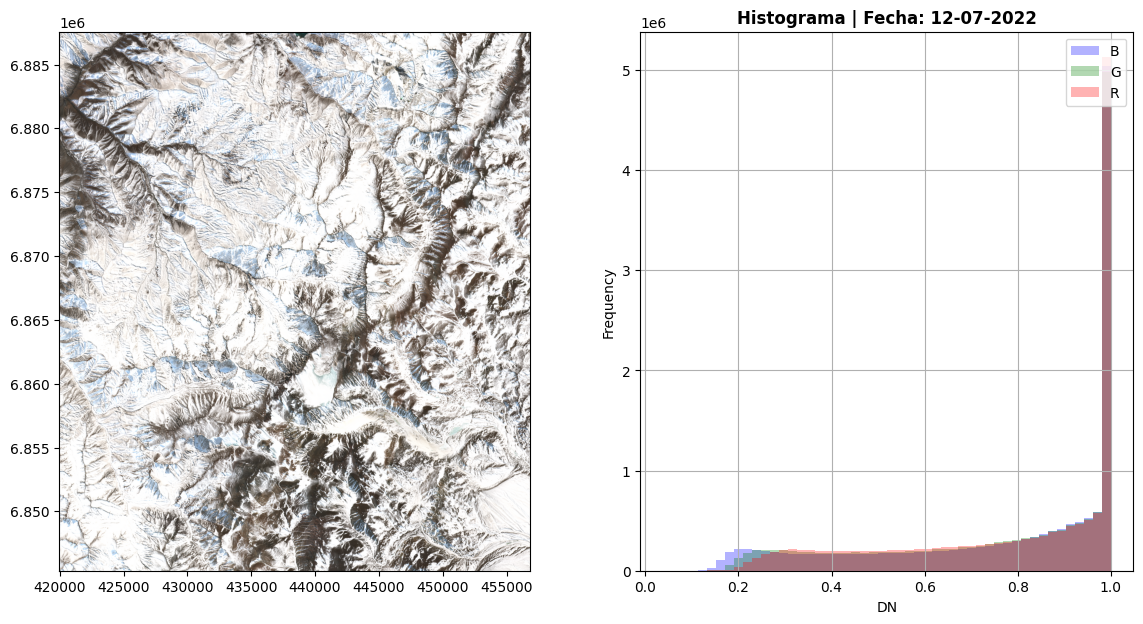

In [16]:
plot_histogram(dem_img3, "Histograma | Fecha: 12-07-2022") # Junio me tira error. Intentaré descargar otro.

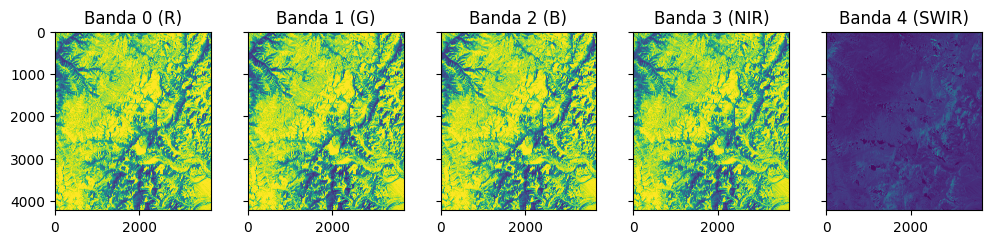

In [17]:
read_bands = [dem_img3.read(idx) for idx in range(1, len(bands)+1)]
plot_bands(read_bands, 5, 1)

In [18]:
dem_img4 = rio.open(img4)

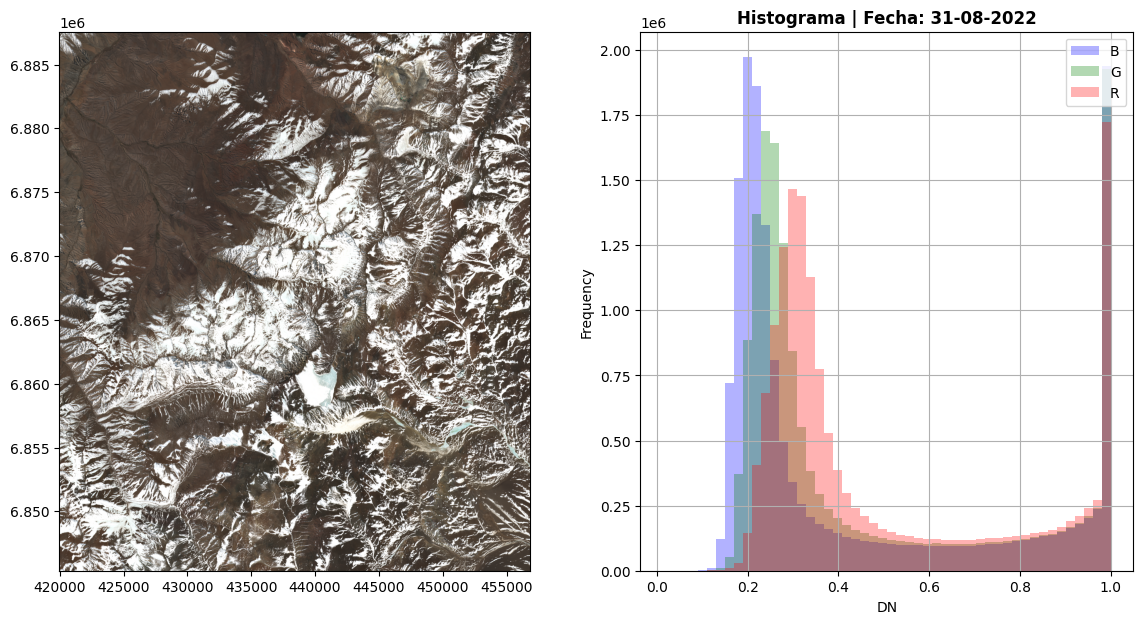

In [19]:
plot_histogram(dem_img4, "Histograma | Fecha: 31-08-2022")

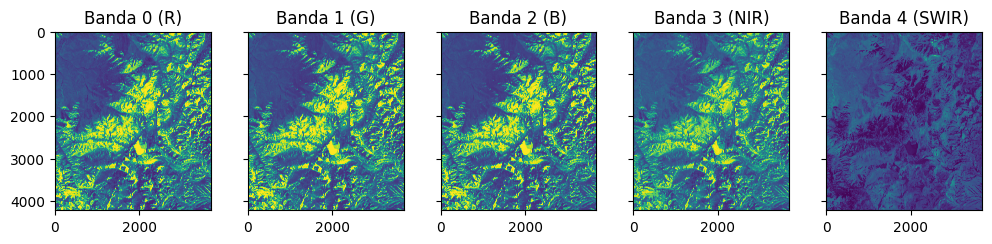

In [20]:
read_bands = [dem_img4.read(idx) for idx in range(1, len(bands)+1)]
plot_bands(read_bands, 5, 1)

In [21]:
dem_img5 = rio.open(img5)

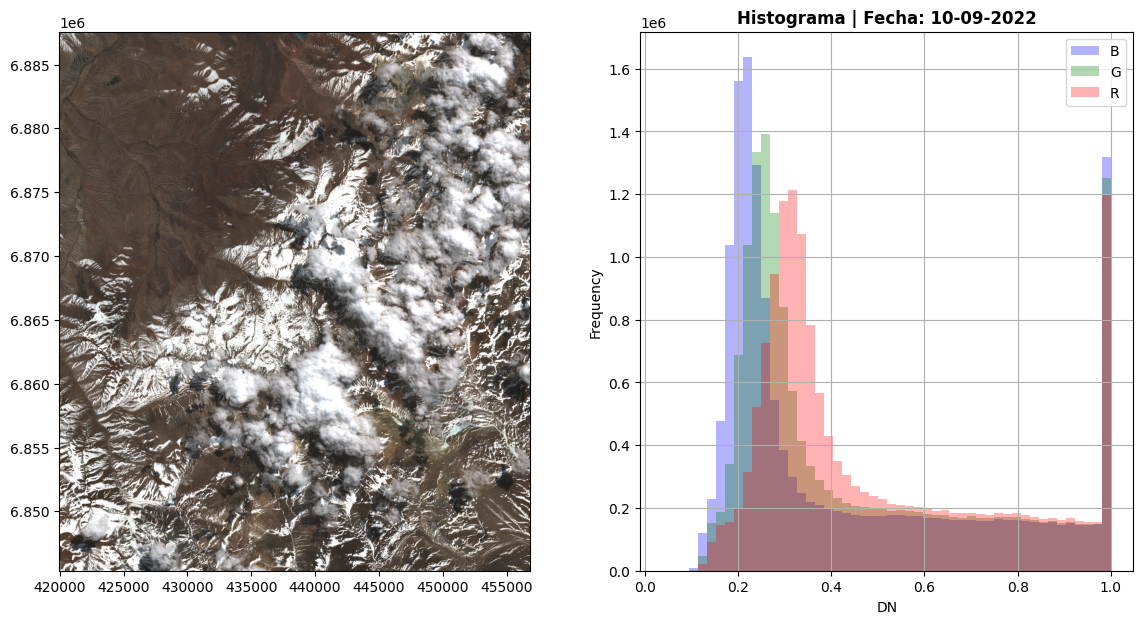

In [22]:
plot_histogram(dem_img5, "Histograma | Fecha: 10-09-2022")

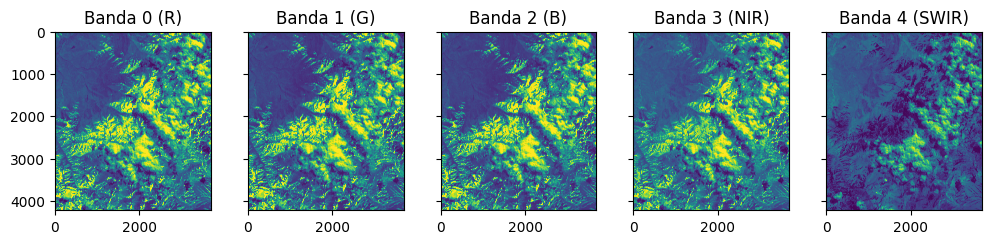

In [23]:
read_bands = [dem_img5.read(idx) for idx in range(1, len(bands)+1)]
plot_bands(read_bands, 5, 1)

In [24]:
dem_img6 = rio.open(img6)

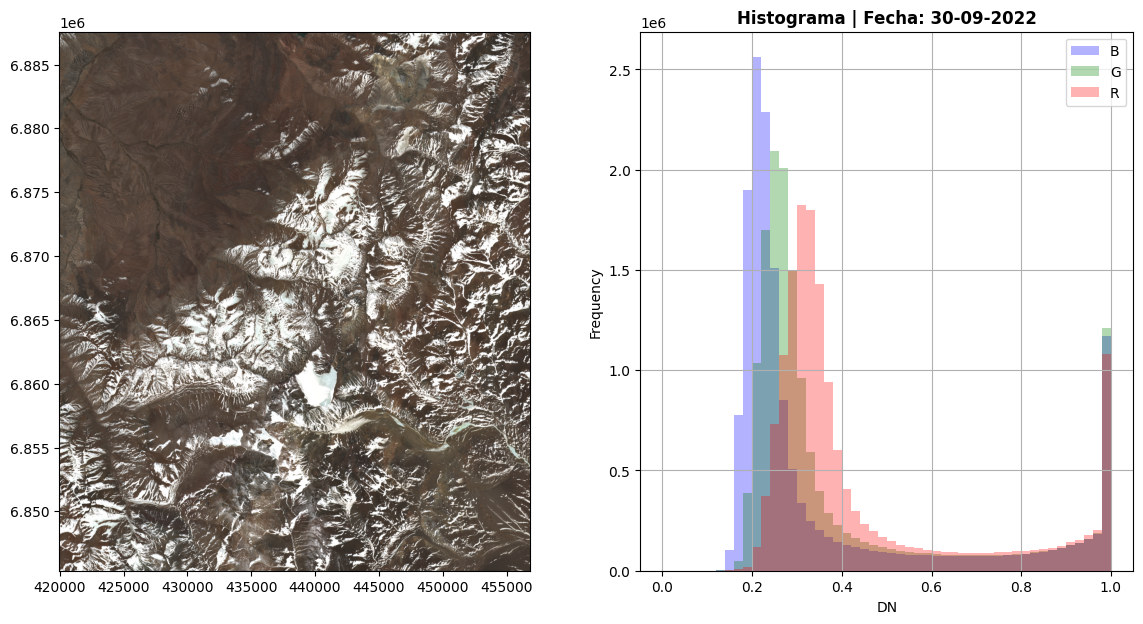

In [25]:
plot_histogram(dem_img6, "Histograma | Fecha: 30-09-2022")

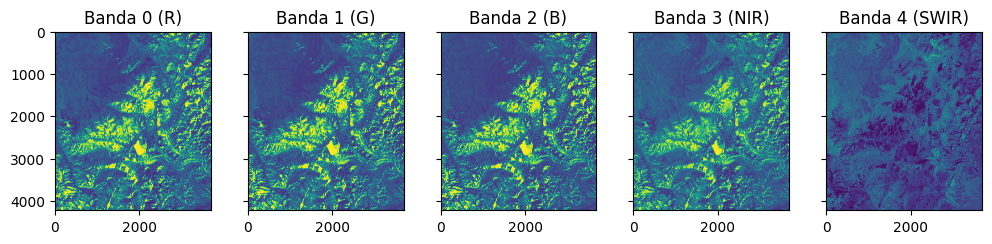

In [26]:
read_bands = [dem_img6.read(idx) for idx in range(1, len(bands)+1)]
plot_bands(read_bands, 5, 1)